The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

https://www.cs.toronto.edu/~kriz/cifar.html

Klasifikasi Gambar berwarna dengan Data Set Cifar10

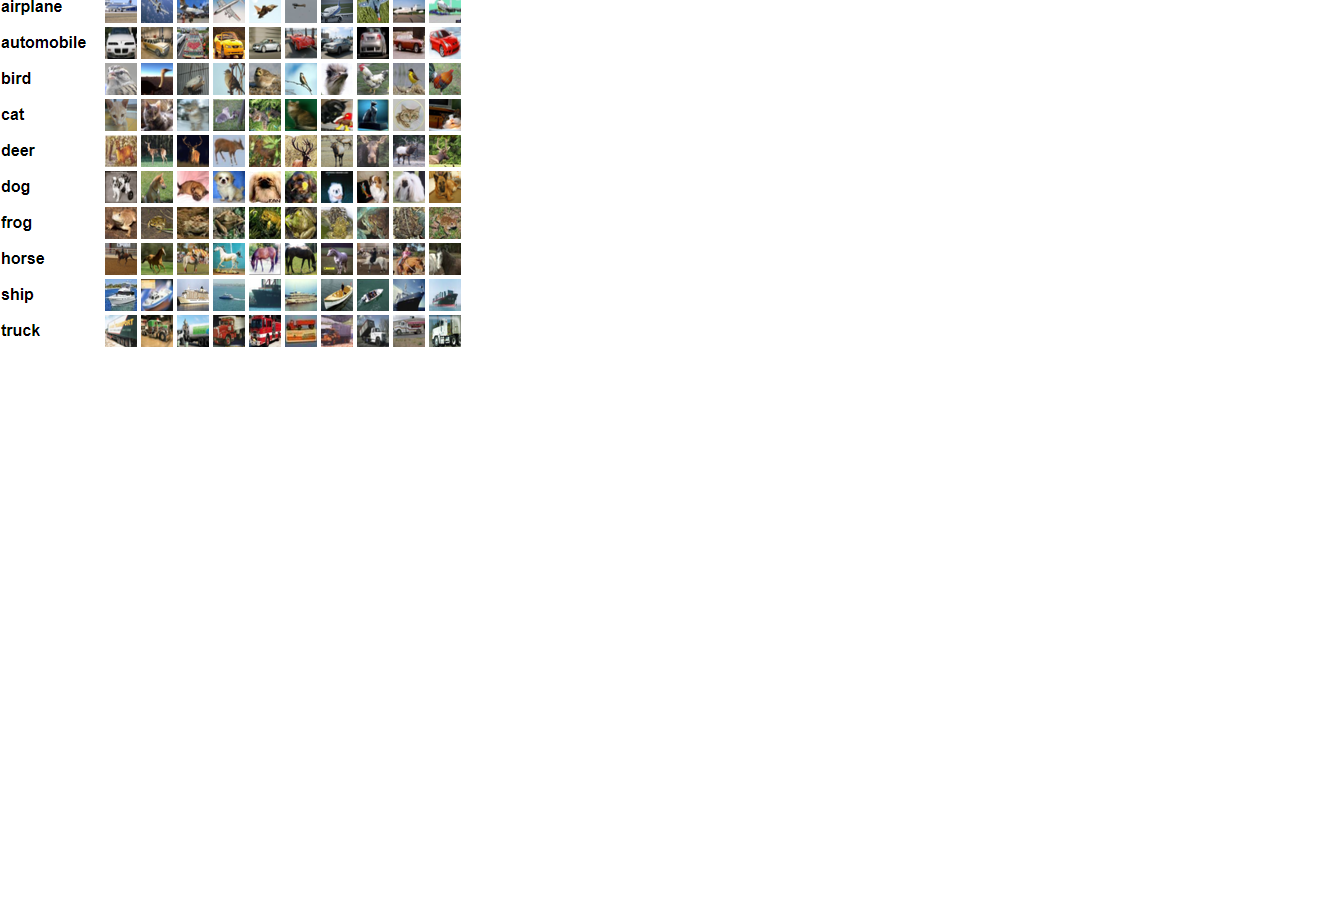


In [1]:
#import library yang diperlukan
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0' :
  raise SystemError('GPU device not found')
print('found GPU at: {}' .format(device_name))

found GPU at: /device:GPU:0


In [3]:
# Mendapatkan dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images[0]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

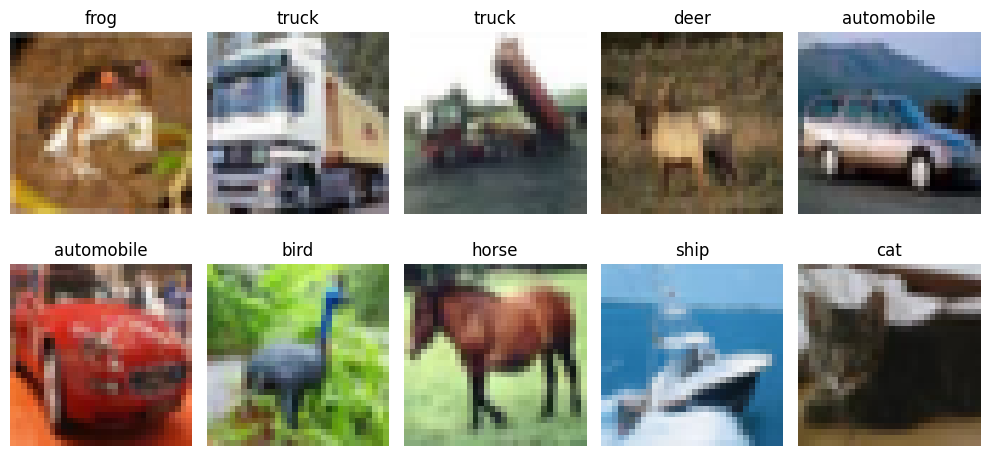

In [4]:
# Define a list of class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create a subplot with 2 rows and 5 columns to display 10 images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')  # Turn off the axis labels

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

In [5]:
# Normalisasi data gambar
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [6]:
# Mengubah label menjadi one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(64,(4,4),activation ='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

# Menampilkan summary model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        3136      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
 flatten_1 (Flatten)         (None, 2048)             

In [14]:
# Kompilasi model
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Melatih model
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 6s 13ms/step - loss: 1.6413 - accuracy: 0.4013 - val_loss: 1.3860 - val_accuracy: 0.5045
Epoch 2/10
274/274 [==============================] - 3s 10ms/step - loss: 1.2550 - accuracy: 0.5525 - val_loss: 1.1980 - val_accuracy: 0.5800
Epoch 3/10
274/274 [==============================] - 3s 10ms/step - loss: 1.0796 - accuracy: 0.6199 - val_loss: 1.0728 - val_accuracy: 0.6237
Epoch 4/10
274/274 [==============================] - 3s 11ms/step - loss: 0.9578 - accuracy: 0.6641 - val_loss: 0.9673 - val_accuracy: 0.6648
Epoch 5/10
274/274 [==============================] - 3s 11ms/step - loss: 0.8579 - accuracy: 0.6998 - val_loss: 0.9130 - val_accuracy: 0.6864
Epoch 6/10
274/274 [==============================] - 3s 12ms/step - loss: 0.7708 - accuracy: 0.7314 - val_loss: 0.8635 - val_accuracy: 0.7028
Epoch 7/10
274/274 [==============================] - 3s 11ms/step - loss: 0.7098 - accuracy: 0.7520 - val_loss: 0.8645 - val_accuracy: 0.7049

In [16]:
# Evaluasi model pada data uji
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Accuracy on test data: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.9087 - accuracy: 0.7137
Accuracy on test data: 0.713699996471405


1/1 [==============================] - 0s 206ms/step


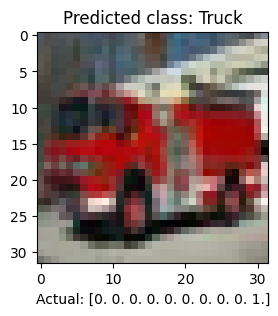

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Memilih satu gambar dari dataset uji
image_index = 23 # Ganti dengan indeks gambar yang ingin Anda prediksi
sample_image = test_images[image_index].reshape(1,32,32,3)

# Melakukan prediksi
predictions = model.predict(sample_image)
predicted_label = np.argmax(predictions)

cifar_10_labels = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Menampilkan gambar dan hasil prediksi
plt.figure(figsize=(3, 3))
plt.imshow(test_images[image_index]) #*, cmap=plt.cm.binary)
plt.xlabel("Actual: " + str(test_labels[image_index]))
plt.title(f'Predicted class: {cifar_10_labels[predicted_label]}')
plt.show()
